In [1]:
#General imports.
import ROOT as r
import math
from BlindersPy3 import Blinders
from BlindersPy3 import FitType
r.gStyle.SetOptStat(0)
r.gStyle.SetOptFit(1111)
import matplotlib.pyplot as plt
import csv
import pandas

import seaborn as sns
sns.set(style="ticks", color_codes=True)
import numpy as np
import matplotlib.pyplot as plt
import matplotlib 
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20) 
import os
import scipy

import uproot # https://indico.cern.ch/event/686641/contributions/2894906/attachments/1606247/2548596/pivarski-uproot.pdf
from awkward import JaggedArray
from root_pandas import read_root # https://github.com/scikit-hep/root_pandas

import warnings
warnings.filterwarnings('once')

%matplotlib inline
plt.rcParams['figure.facecolor'] = 'white'

The history saving thread hit an unexpected error (DatabaseError('database disk image is malformed',)).History will not be written to the database.
Welcome to JupyROOT 6.12/06


### Lets make a toy function which has the form A Sin(Bx + C) + D

In [2]:
def AbsSin(x,a,b,c,d):
    return a*r.TMath.Abs(r.TMath.Sin(b*x + c)) + d
    #return a*(r.TMath.Sin(b*x + c)) + d

In [3]:
AbsSin(1,2,3,4,5)

6.313973197437578

In [4]:
bins = []
times = []
amp = 1
omega = 2*r.TMath.Pi()*(0.229 * 10**6)
phase = 0
offset = 0
for i in range(1,1000000):
    x = i/(10**9) #ns
    bins.append(AbsSin(x,amp,omega,phase,offset))
    times.append(x)

In [5]:
print(bins[0:10])

[0.001438848938872129, 0.0028776948989135153, 0.004316534901299583, 0.00575536596721809, 0.007194185117875295, 0.008632989374502126, 0.010071775758360345, 0.011510541290748716, 0.012949282993009171, 0.01438799788653298]


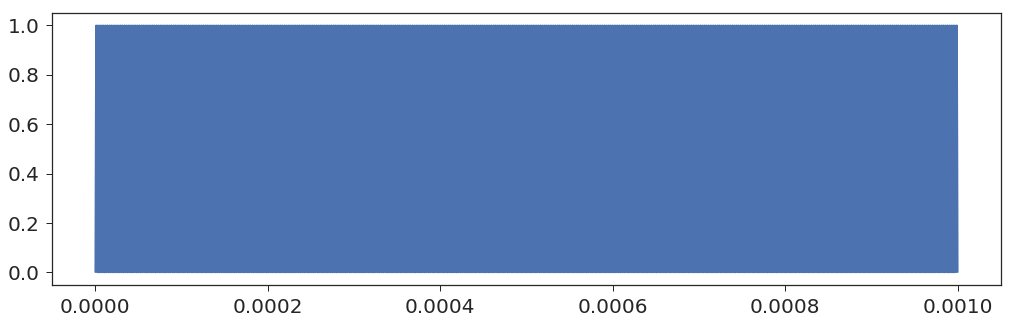

In [6]:
fig,ax = plt.subplots(figsize=(17,5))
plt.plot(times,bins)
plt.show()

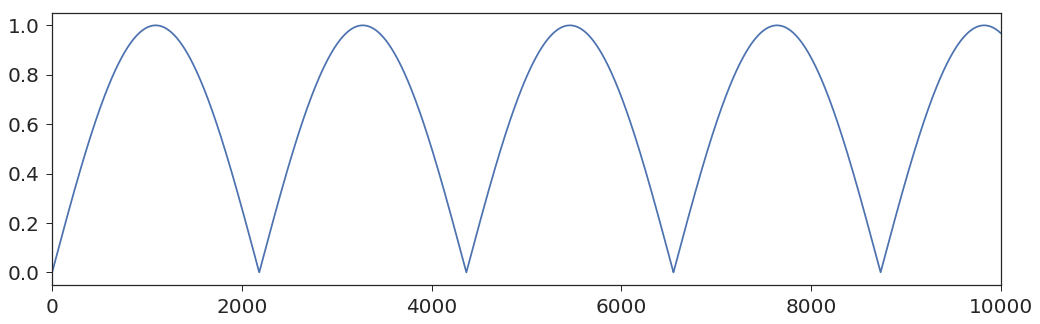

In [7]:
fig,ax = plt.subplots(figsize=(17,5))
plt.plot(bins)
plt.xlim(0,10000)
plt.show()

In [8]:
Npart = len(bins)
minBinCenter = times[0]
maxBinCenter = times[len(bins)-1]

capT = maxBinCenter - minBinCenter
print(Npart, capT, minBinCenter, maxBinCenter)
deltaT = capT/Npart #nanoseconds
deltaF = 1/capT
print(deltaT, deltaF)

deltaTns = deltaT #nanoseconds
limmaxHz = (1/(deltaTns))
limmaxMHz = limmaxHz / math.pow(10.0,6)

limmax = 2*deltaF*Npart 
print(limmax,limmaxMHz)

999999 0.000999998 1e-09 0.000999999
9.999989999989999e-10 1000.002000004
2000002000.004 1000.0010000020001


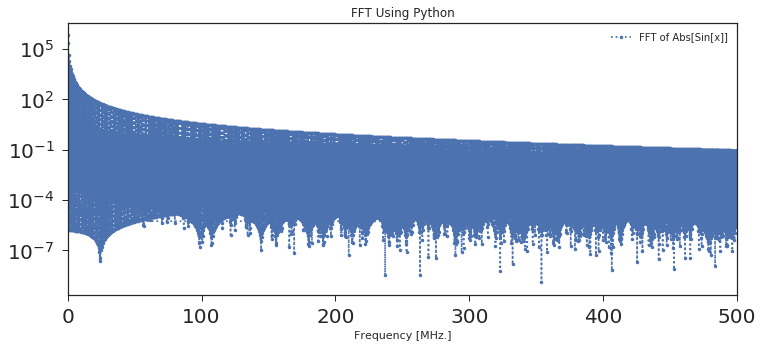

In [9]:
ding = np.fft.fft(np.array(bins))

n = len(bins)
#d = 1
d = (times[1] - times[0])

freq = np.fft.fftfreq(n, d)

fig, ax = plt.subplots(figsize=(12, 5))
plt.plot([x/10**6 for x in freq],np.abs(ding),':.',label='FFT of Abs[Sin[x]]')
plt.title("FFT Using Python")
plt.xlabel("Frequency [MHz.]")
plt.xlim(0,limmaxMHz/2)# *10.**6)
plt.yscale("log")
plt.legend()
plt.show()

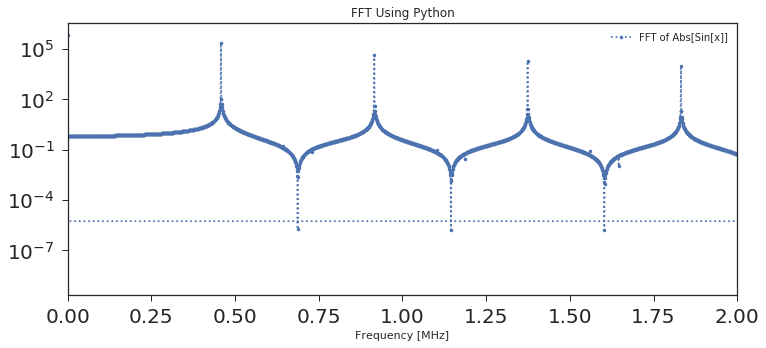

In [10]:
fig, ax = plt.subplots(figsize=(12, 5))
plt.plot([x/10**6 for x in freq],np.abs(ding),':.',label='FFT of Abs[Sin[x]]')
plt.title("FFT Using Python")
plt.xlabel("Frequency [MHz]")
plt.xlim(0,2)# *10.**6)
plt.yscale("log")
plt.legend()
plt.show()

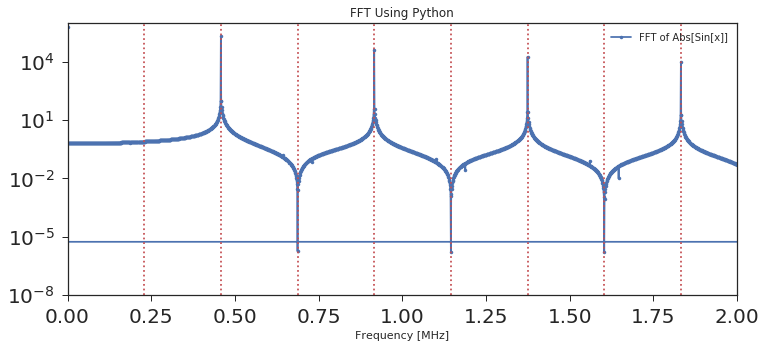

In [11]:
fig, ax = plt.subplots(figsize=(12, 5))
plt.plot([x/10**6 for x in freq],np.abs(ding),'.-',label='FFT of Abs[Sin[x]]')
plt.title("FFT Using Python")
plt.xlabel("Frequency [MHz]")
plt.xlim(0,2)# *10.**6)
plt.yscale("log")
plt.legend()

for i in range(10):
    plt.plot([0.229*i,0.229*i],[0.00000001,1000000], 'r:')
    
plt.ylim(0.00000001,1000000)

plt.show()

---

### Now lets add in the Extra sinusoidal oscillation

In [12]:
def AbsSin_Complex(x,a,b,c,d,e,f):
    return a*r.TMath.Abs(r.TMath.Sin(b*x + c)) + d + e*(r.TMath.Sin(b*x + f))
    #return a*(r.TMath.Sin(b*x + c)) + d

In [13]:
AbsSin_Complex(1,2,3,4,5,6,7)

3.0498465321013595

In [14]:
bins = []
times = []
amp = 1
omega = 2*r.TMath.Pi()*(0.229 * 10**6)
phase = 0
offset = 0
amp2 = 0.02
phase2 = 0.05
for i in range(1,1000000):
    x = i/(10**9) #ns
    bins.append(AbsSin_Complex(x,amp,omega,phase,offset,amp2, phase2))
    times.append(x)

In [15]:
print(bins[0:10])

[0.0024671723046206327, 0.00393475611607211, 0.0054023317814478125, 0.006869896262444419, 0.008337446520781763, 0.009804979518209125, 0.011272492216511516, 0.012739981577515977, 0.01420744456309786, 0.015674878135187125]


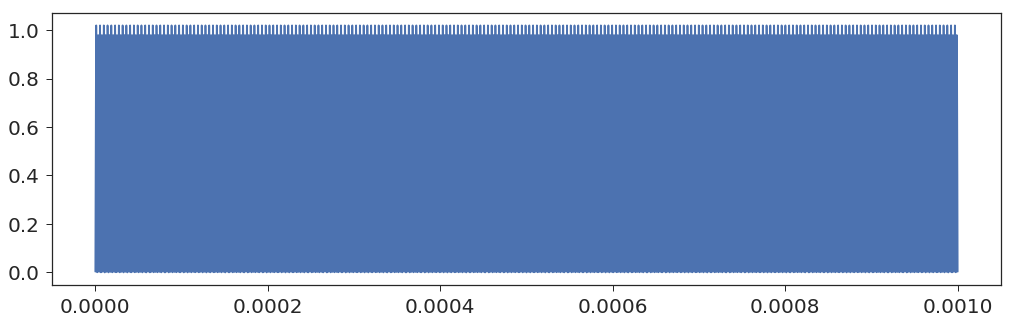

In [16]:
fig,ax = plt.subplots(figsize=(17,5))
plt.plot(times,bins)
plt.show()

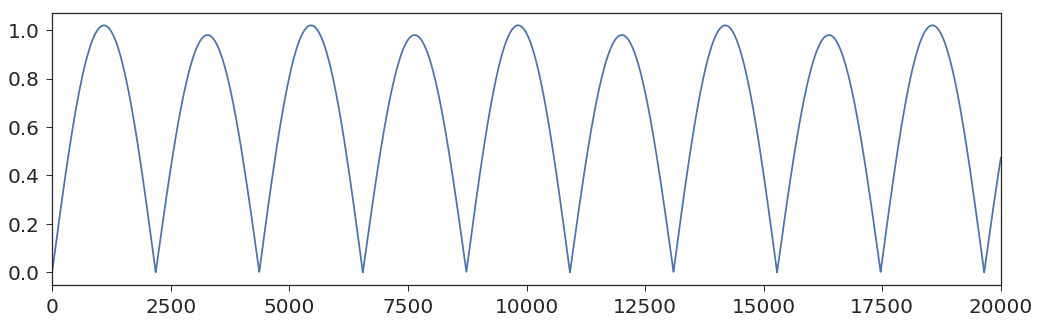

In [17]:
fig,ax = plt.subplots(figsize=(17,5))
plt.plot(bins)
plt.xlim(0,20000)
plt.show()

In [18]:
Npart = len(bins)
minBinCenter = times[0]
maxBinCenter = times[len(bins)-1]

capT = maxBinCenter - minBinCenter
print(Npart, capT, minBinCenter, maxBinCenter)
deltaT = capT/Npart #nanoseconds
deltaF = 1/capT
print(deltaT, deltaF)

deltaTns = deltaT #nanoseconds
limmaxHz = (1/(deltaTns))
limmaxMHz = limmaxHz / math.pow(10.0,6)

limmax = 2*deltaF*Npart 
print(limmax,limmaxMHz)

999999 0.000999998 1e-09 0.000999999
9.999989999989999e-10 1000.002000004
2000002000.004 1000.0010000020001


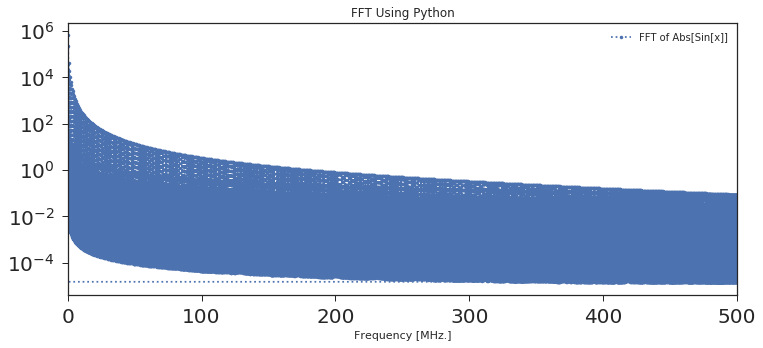

In [19]:
ding = np.fft.fft(np.array(bins))

n = len(bins)
#d = 1
d = (times[1] - times[0])

freq = np.fft.fftfreq(n, d)

fig, ax = plt.subplots(figsize=(12, 5))
plt.plot([x/10**6 for x in freq],np.abs(ding),':.',label='FFT of Abs[Sin[x]]')
plt.title("FFT Using Python")
plt.xlabel("Frequency [MHz.]")
plt.xlim(0,limmaxMHz/2)# *10.**6)
plt.yscale("log")
plt.legend()
plt.show()

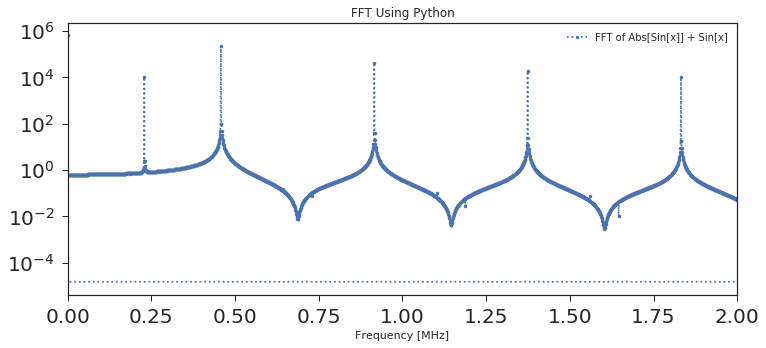

In [20]:
fig, ax = plt.subplots(figsize=(12, 5))
plt.plot([x/10**6 for x in freq],np.abs(ding),':.',label='FFT of Abs[Sin[x]] + Sin[x]')
plt.title("FFT Using Python")
plt.xlabel("Frequency [MHz]")
plt.xlim(0,2)# *10.**6)
plt.yscale("log")
plt.legend()
plt.show()

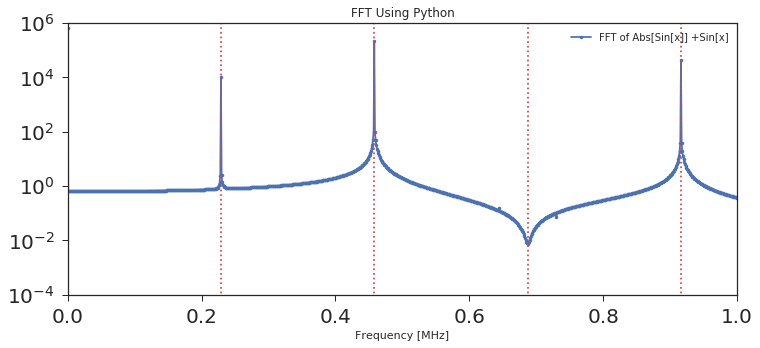

In [21]:
fig, ax = plt.subplots(figsize=(12, 5))
plt.plot([x/10**6 for x in freq],np.abs(ding),'.-',label='FFT of Abs[Sin[x]] +Sin[x]')
plt.title("FFT Using Python")
plt.xlabel("Frequency [MHz]")
plt.xlim(0,1)# *10.**6)
plt.yscale("log")
plt.legend()

for i in range(10):
    plt.plot([0.229*i,0.229*i],[0.00000001,1000000], 'r:')
    
plt.ylim(0.0001,1000000)

plt.show()